# Shooting Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

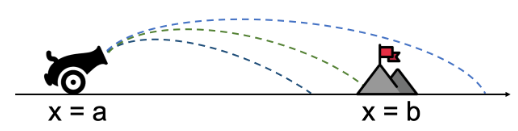

$$ \frac{d^2y}{dt^2} = -g $$

with the two boundary conditions are: \\( y(0) = 0 \\) and \\(y(5) = 50 \\). We would like to fing the \\( y~'(0) \\)

34.499999999999986


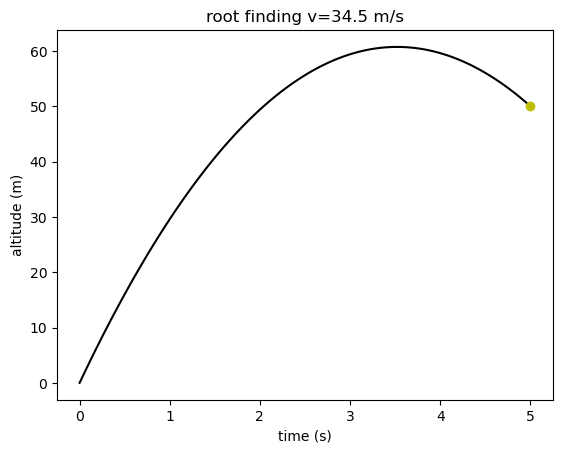

In [2]:
g = 9.8
t = np.linspace(0, 5, 100)
y0 = 0
v0 = 25

def f_ODE(t, u):
    return np.array([u[1], -g])

u0 = [y0, v0]

def objective(x):
    # where x is a vector that contains the unknows initial values
    sol = solve_ivp(f_ODE, [t[0], t[-1]], [0, x[0]])
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

# update the initial values
u0 = [y0, v0]

sol_ODE = solve_ivp(f_ODE, [t[0], t[-1]], u0, t_eval = t)

plt.plot(sol_ODE.t, sol_ODE.y[0], 'k')
plt.plot(5, 50, 'yo')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title('root finding v={:.1f} m/s'.format(v0))
plt.show()

Testing different initial guesses

In [3]:
for v0_guess in range(1, 100, 10):
    v0, = fsolve(objective, v0_guess)
    print('Init: %d, Result: %.1f' \
          %(v0_guess, v0))

Init: 1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5
